PIPELINE DE VALIDACIÓN DE REGRESIÓN

In [ ]:
# Librerias para manipulacion de Data y Gráficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import resample

CARGA DE DATOS

In [ ]:
#Leer el DataSet
data = pd.read_csv("dataset_facturacion_2021_2025_crecimiento (1).csv")
print("✅ Datos cargados correctamente.")
print("Dimensiones:", data.shape)
data.head()
# explicación del comando
#sep=";" indica a pandas que el separador de columnas en el CSV es punto y coma.
#head() te muestra las primeras filas y verifica que las columnas se hayan separado correctamente.

✅ Datos cargados correctamente.
Dimensiones: (341886, 9)


,anio,id_prestador,nombre_prestador,numero_factura,fecha_radicacion,valor_factura,aplicativo,tipo_factura,cantidad_lineas
0,2021,900000314,PRESTADOR_0314,FAC-2021-000001,19/05/2021,4621.0,Interno,Transporte,1
1,2021,900000064,PRESTADOR_0064,FAC-2021-000002,20/08/2021,2485269.0,Interno,Salud básica,110
2,2021,900000009,PRESTADOR_0009,FAC-2021-000003,10/12/2021,21441.0,Interno,Transporte,5
3,2021,900000076,PRESTADOR_0076,FAC-2021-000004,17/11/2021,9051.0,Interno,Salud básica,66
4,2021,900000703,PRESTADOR_0703,FAC-2021-000005,18/05/2021,4240179.0,Interno,Salud básica,157


ANÁLISIS EXPLORATORIO

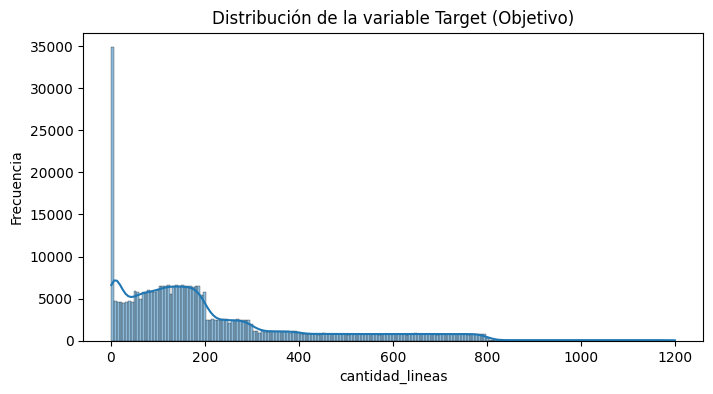

In [ ]:
#Distribución de la variable objetivo
plt.figure(figsize=(8,4))
sns.histplot(data["cantidad_lineas"], kde=True)
plt.title("Distribución de la variable Target (Objetivo)")
plt.xlabel("cantidad_lineas")
plt.ylabel("Frecuencia")
plt.show()

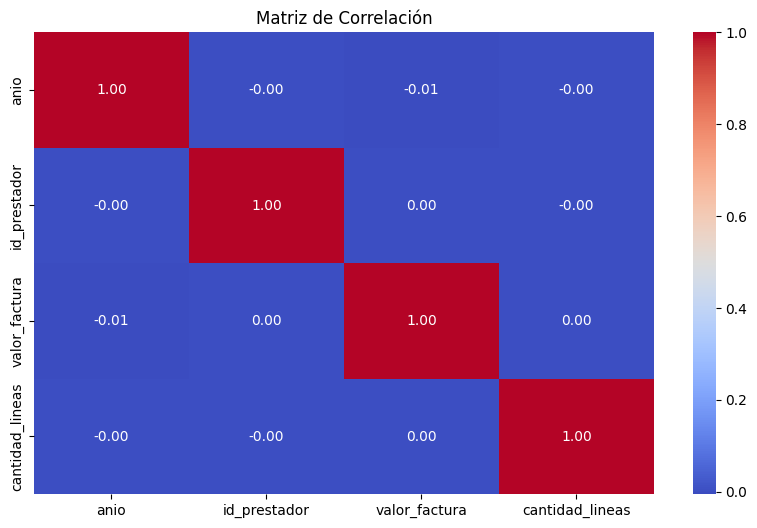

In [ ]:
#Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
#Revisar correlaciones específicas
corr_target = data.corr(numeric_only=True)["cantidad_lineas"].sort_values(ascending=False)
print("cantidad_lineas:")
print(corr_target)

cantidad_lineas:
cantidad_lineas    1.000000
valor_factura      0.000321
id_prestador      -0.000941
anio              -0.000963
Name: cantidad_lineas, dtype: float64


In [ ]:
#PREPARACIÓN DE DATOS PARA MODELADO
X = data.drop(columns=["cantidad_lineas"])
y = data["cantidad_lineas"]

In [ ]:
# Escalamiento
scaler = StandardScaler()
# Seleccionar solo columnas numéricas para el escalamiento
X_numerical = X.select_dtypes(include=['number'])
X_scaled = scaler.fit_transform(X_numerical)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# ENTRENAMIENTO DE MODELOS DE REGRESIÓN
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

 # Mostrar comparación de modelos
df_resultados = pd.DataFrame(resultados)
print("\n📊 Resultados comparativos:")
print(df_resultados.sort_values(by="R2", ascending=False))



📊 Resultados comparativos:
              Modelo         MAE        RMSE        R2
0   Regresión Lineal  158.061145  210.586881 -0.000022
2  Gradient Boosting  158.084476  210.613789 -0.000277
1      Random Forest  170.158981  224.738751 -0.138945


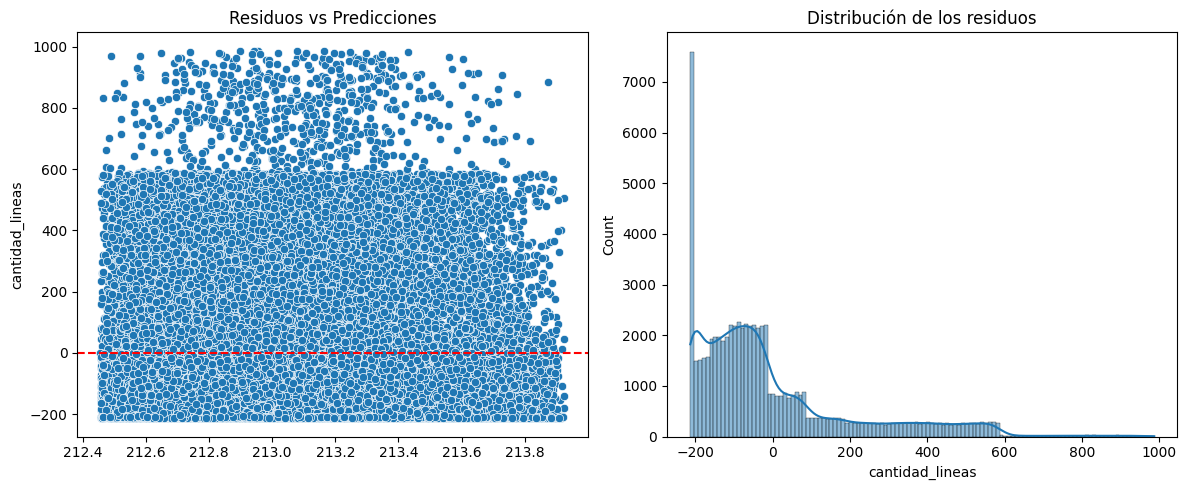


🏁 El mejor modelo según R² es: Regresión Lineal


In [ ]:
# VALIDACIÓN DE LA REGRESIÓN LINEAL

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

residuos = y_test - y_pred_lr

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred_lr, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones")

plt.subplot(1,2,2)
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")

plt.tight_layout()
plt.show()


# CONCLUSIÓN AUTOMÁTICA

best_model = df_resultados.loc[df_resultados["R2"].idxmax(), "Modelo"]
print(f"\n🏁 El mejor modelo según R² es: {best_model}")

todo lo anterior hace:


*   Analiza la distribución de la variable objetivo (cantidad de lineas).
*   Genera la matriz de correlación.
*   Revisa correlaciones con la variable objetivo.
*   Escala los datos y separa entrenamiento/prueba.
*   Entrena tres algoritmos de regresión (Lineal, Random Forest, Gradient Boosting).
*   Mide métricas (MAE, RMSE, R²).
*   Grafica residuos y distribución para validar la linealidad.
*   Indica automáticamente cuál modelo fue el mejor


Visualización de datos

In [ ]:
# copia del original
df = data.copy()

In [ ]:
# Mostrar 5 filas de manera aleatoria
df.sample(5)

,anio,id_prestador,nombre_prestador,numero_factura,fecha_radicacion,valor_factura,aplicativo,tipo_factura,cantidad_lineas
44811,2021,900000954,PRESTADOR_0954,FAC-2021-044812,10/12/2021,940482.0,Interno,Salud compleja,289
242420,2024,900001238,PRESTADOR_1238,FAC-2024-042945,17/05/2024,9317.0,Externo,Salud media,230
263891,2024,900000877,PRESTADOR_0877,FAC-2024-064416,31/10/2024,8911.0,Interno,Salud básica,164
119834,2022,900000897,PRESTADOR_0897,FAC-2022-053861,27/06/2022,14195.0,Interno,Salud básica,113
7876,2021,900000121,PRESTADOR_0121,FAC-2021-007877,03/11/2021,6052.0,Interno,Salud media,232


In [ ]:
#Entender y conocer el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341886 entries, 0 to 341885
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   anio              341886 non-null  int64  
 1   id_prestador      341886 non-null  int64  
 2   nombre_prestador  341886 non-null  object 
 3   numero_factura    341886 non-null  object 
 4   fecha_radicacion  341886 non-null  object 
 5   valor_factura     341886 non-null  float64
 6   aplicativo        341886 non-null  object 
 7   tipo_factura      341886 non-null  object 
 8   cantidad_lineas   341886 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 23.5+ MB


In [ ]:
# Calculemos cuanto datos nulos hay, y mostremos un porcentaje de esos datos nulos si se encuentran presentes
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

,Cuantos Nulos,Porcentaje
anio,0,0.0
id_prestador,0,0.0
nombre_prestador,0,0.0
numero_factura,0,0.0
fecha_radicacion,0,0.0
valor_factura,0,0.0
aplicativo,0,0.0
tipo_factura,0,0.0
cantidad_lineas,0,0.0


In [ ]:
# Detectar valores duplicados (consistencia)
df.duplicated().sum()

np.int64(0)

In [ ]:
#Validar rangos esperados (exactitud)
df.describe()

,anio,id_prestador,valor_factura,cantidad_lineas
count,341886.000000,3.418860e+05,3.418860e+05,341886.000000
mean,2023.050297,9.000006e+08,8.151473e+05,212.880858
std,1.420414,4.231146e+02,1.342353e+06,211.208215
min,2021.000000,9.000000e+08,5.600000e+01,1.000000
25%,2022.000000,9.000001e+08,1.109900e+04,67.000000
50%,2023.000000,9.000005e+08,2.210600e+04,149.000000
75%,2024.000000,9.000009e+08,1.320867e+06,274.000000
max,2025.000000,9.000013e+08,4.653431e+06,1200.000000


In [ ]:
# Traspone las columnas (exactitud)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anio,341886.0,2.023050e+03,1.420414e+00,2021.0,2022.0,2023.0,2.024000e+03,2025.0
id_prestador,341886.0,9.000006e+08,4.231146e+02,900000001.0,900000110.0,900000519.0,9.000009e+08,900001338.0
valor_factura,341886.0,8.151473e+05,1.342353e+06,56.0,11099.0,22106.0,1.320867e+06,4653431.0
cantidad_lineas,341886.0,2.128809e+02,2.112082e+02,1.0,67.0,149.0,2.740000e+02,1200.0


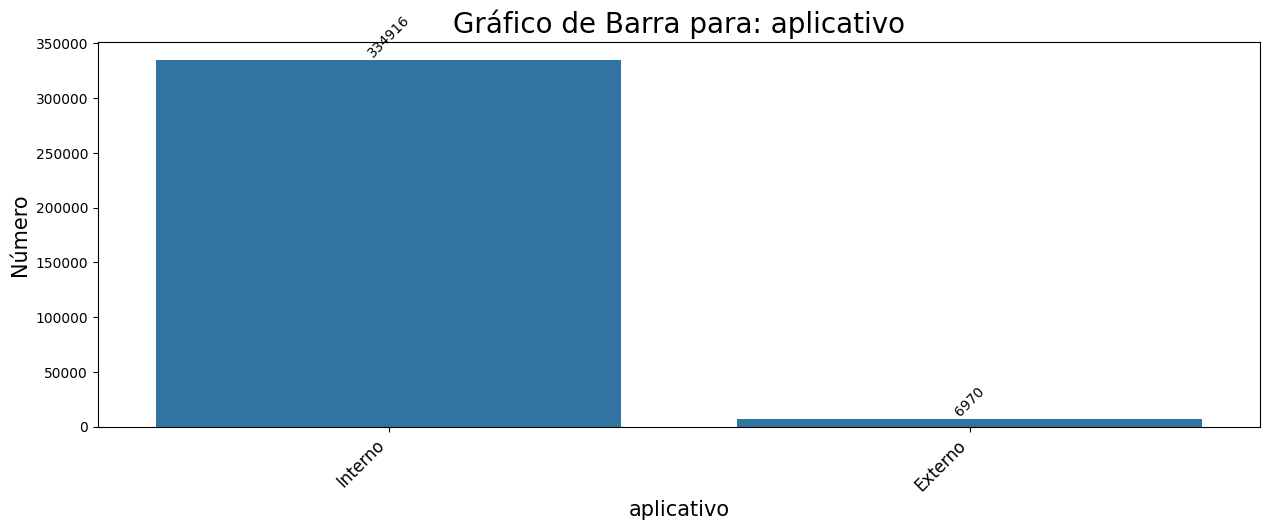

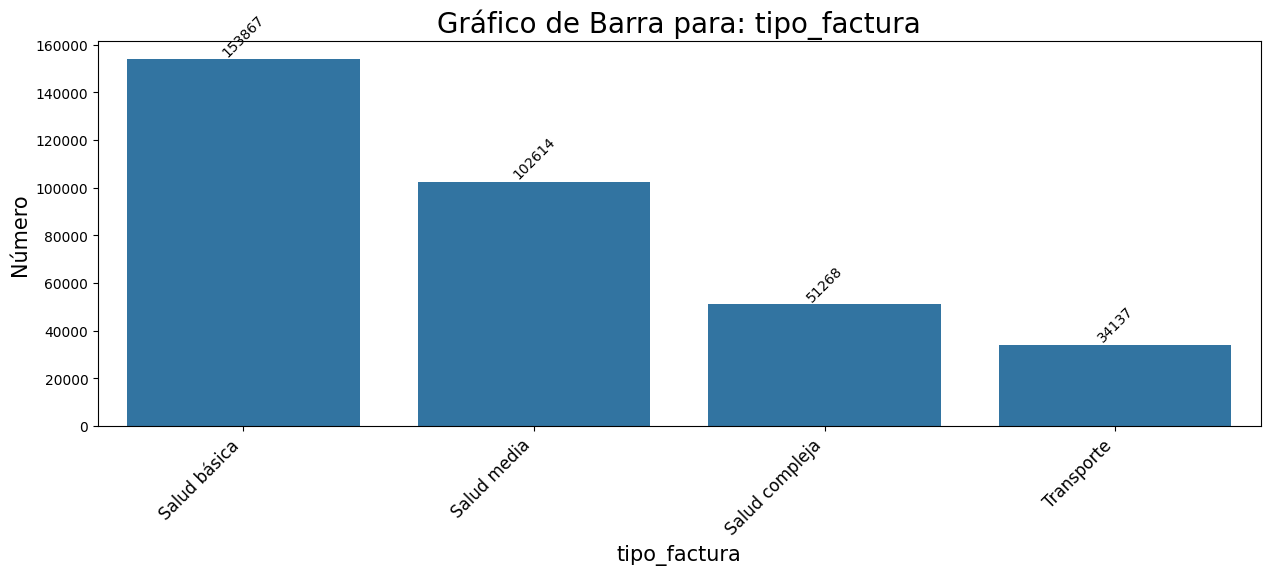

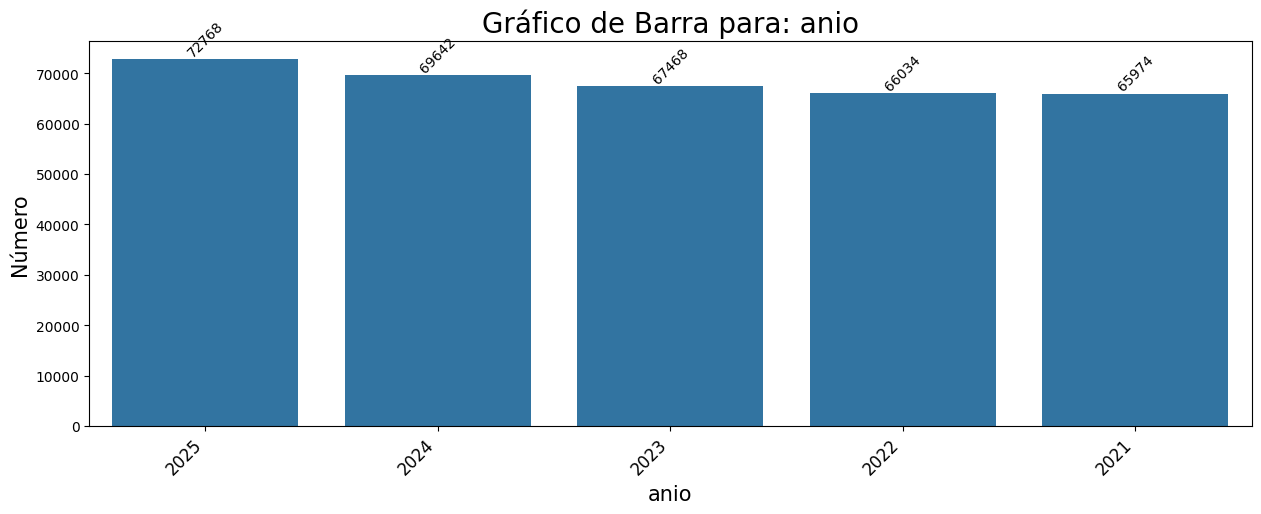

In [ ]:
# graficos de barra
import plotly.graph_objects as go
import plotly.express as px

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Número', fontsize=15)
        plt.title(f'Gráfico de Barra para: {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ['aplicativo','tipo_factura','anio']

plot_bar_graphs(df, cat_features)

**Objetivo general**

Predecir el volumen mensual de facturación y por aplicativo para el año siguiente, utilizando datos históricos (2021-2025). Adicionalmente, calcular la capacidad del equipo necesaria para cumplir con las metas y los tiempos de procesamiento.

**Proyecciones para 2026:**

1.   Facturación esperada, considerando el crecimiento sobre la tendencia histórica.
2.   Carga total de horas necesarias para procesar cada factura, tomando en cuenta el valor, la cantidad de líneas y el aplicativo.
3. Número de colaboradores necesarios según la capacidad mensual y el SLA.

**Variables clave del modelo**

* Porcentaje de gestión de cada aplicativo (ajustable).
* Tiempo promedio de gestión por factura (en horas o minutos), en función del valor, número de líneas y aplicativo.
* Cumplimiento operativo respecto al tiempo máximo de procesamiento (cada factura ≤ 20 días calendario desde su radicación).

**Nota:**
El modelo se generó con definiciones y variables basadas en conocimiento de negocio, validando los entendimientos y apoyándose en ChatGPT para estructurarlo.

In [ ]:
#Varibales ingresdas.
#Se debe ingresar el archivo historico (DataSet)

# =========================
# VARIABLES CONFIGURABLES
# =========================
p_interno = 0.92          # porcentaje esperado de facturación interna el próximo año
p_externo = 0.08          # porcentaje esperado de facturación externa
anio_proyeccion = 2026
dias_sla = 20             # Días de gestión definidas: máximo 20 días
horas_diarias_por_colaborador = 8
dias_laborales_mes = 20


# === VARIABLES DE CRECIMIENTO ===
crecimiento_facturas = 0.05       # +5% de crecimiento en cantidad de facturas
crecimiento_facturacion = 0.03    # +3% de crecimiento en valor total facturado


#Variables de salida
# 1. Capacidad total del equipo necesario para gestionar el 100% de las facturas.
# 2. Archivo con la facturación  proyectadas para el 2026.

# FUNCIONES DE TIEMPO
# =========================
# Funciones que estiman horas promedio según el valor de la factura
def horas_por_factura_interno(valor, lineas):
    """Tiempo promedio interno según valor + líneas"""
    base = 0.25 if valor <= 5_000_000 else 0.8 if valor <= 300_000_000 else 1.5
    # Factor correctivo por cantidad de líneas
    ajuste_lineas = 1 + min(lineas / 400, 1.2) * 0.3  # máximo +30% si supera 400 líneas
    return base * ajuste_lineas

def horas_por_factura_externo(valor, lineas):
    """Externo tarda 50% más que interno"""
    base = horas_por_factura_interno(valor, lineas)
    return base * 1.5

In [ ]:
# FUNCIONES DE TIEMPO
# =========================
# Funciones que estiman horas promedio según el valor de la factura
def horas_por_factura_interno(valor, lineas):
    """Tiempo promedio interno según valor + líneas"""
    base = 0.25 if valor <= 5_000_000 else 0.8 if valor <= 300_000_000 else 1.5
    # Factor correctivo por cantidad de líneas
    ajuste_lineas = 1 + min(lineas / 400, 1.2) * 0.3  # máximo +30% si supera 400 líneas
    return base * ajuste_lineas

def horas_por_factura_externo(valor, lineas):
    """Externo tarda 50% más que interno"""
    base = horas_por_factura_interno(valor, lineas)
    return base * 1.5


In [ ]:
# CARGAR DATASET HISTÓRICO
# =========================
df = pd.read_csv("dataset_facturacion_2021_2025_crecimiento (1).csv")
df["fecha_radicacion"] = pd.to_datetime(df["fecha_radicacion"], format="%d/%m/%Y", errors='coerce')
df.columns = df.columns.str.strip()

# Limpio y convierte 'valor_factura' en numerico
df['valor_factura'] = df['valor_factura'].astype(str).str.replace('$', '', regex=False).str.replace('.', '', regex=False).astype(float)

# Clean and convert 'cantidad_lineas' to numerico
df['cantidad_lineas'] = pd.to_numeric(df['cantidad_lineas'], errors='coerce')

CODIGO VALORES ANUALES

In [ ]:
# AGRUPAR POR AÑO Y APLICATIVO
# =========================
historico = df.groupby(["anio", "aplicativo"]).agg({
    "numero_factura": "count",
    "valor_factura": "sum"
}).reset_index().rename(columns={
    "numero_factura": "facturas",
    "valor_factura": "facturacion"
})
# CALCULAR TENDENCIAS
# =========================
promedio_facturas = historico.groupby("aplicativo")["facturas"].mean().to_dict()
promedio_facturacion = historico.groupby("aplicativo")["facturacion"].mean().to_dict()

# PROYECCIÓN 2026
# =========================
proyeccion = pd.DataFrame({
    "aplicativo": ["Interno", "Externo"],
    "porcentaje": [p_interno, p_externo]
})
# Calculamos con crecimiento basado en el promedio histórico
total_facturas = historico["facturas"].sum() / len(historico["anio"].unique())
total_facturacion = historico["facturacion"].sum() / len(historico["anio"].unique())

proyeccion["facturas_estimadas"] = total_facturas * (1 + crecimiento_facturas) * proyeccion["porcentaje"]
proyeccion["facturacion_estimadas"] = total_facturacion * (1 + crecimiento_facturacion) * proyeccion["porcentaje"]

# CÁLCULO DE HORAS
# =========================
# Usamos el histórico para estimar horas promedio reales ponderadas
def calcular_horas_promedio(app, df):
    if app == "Interno":
        return np.mean([horas_por_factura_interno(v, l) for v, l in zip(df["valor_factura"], df["cantidad_lineas"])])
    else:
        return np.mean([horas_por_factura_externo(v, l) for v, l in zip(df["valor_factura"], df["cantidad_lineas"])])

promedio_interno = calcular_horas_promedio("Interno", df[df["aplicativo"] == "Interno"])
promedio_externo = calcular_horas_promedio("Externo", df[df["aplicativo"] == "Externo"])

proyeccion["horas_por_factura"] = [promedio_interno, promedio_externo]
proyeccion["total_horas_mes"] = (proyeccion["facturas_estimadas"] / 12) * proyeccion["horas_por_factura"]

# CAPACIDAD OPERATIVA
# =========================
capacidad_colaborador_mes = horas_diarias_por_colaborador * dias_laborales_mes
proyeccion["colaboradores_necesarios"] = np.ceil(proyeccion["total_horas_mes"] / capacidad_colaborador_mes)

#SALIDA DE RESULTADOS
# =========================
print(f"\n📆 PROYECCIÓN DE FACTURACIÓN Y CAPACIDAD {anio_proyeccion}")
print("=" * 60)
for _, row in proyeccion.iterrows():
    print(f"\nAplicativo: {row['aplicativo']}")
    print(f"  • Facturas/mes: {row['facturas_estimadas']/12:,.0f}")
    print(f"  • Facturación/mes: ${row['facturacion_estimadas']/12:,.0f}")
    print(f"  • Horas promedio por factura: {row['horas_por_factura']:.2f}")
    print(f"  • Total horas/mes: {row['total_horas_mes']:,.0f}")
    print(f"  • Colaboradores requeridos: {int(row['colaboradores_necesarios'])}")

total_colabs = int(proyeccion["colaboradores_necesarios"].sum())
print(f"\n👥 Total colaboradores requeridos: {total_colabs}")


📆 PROYECCIÓN DE FACTURACIÓN Y CAPACIDAD 2026

Aplicativo: Interno
  • Facturas/mes: 5,504
  • Facturación/mes: $44,014,039,216
  • Horas promedio por factura: 0.48
  • Total horas/mes: 2,653
  • Colaboradores requeridos: 17

Aplicativo: Externo
  • Facturas/mes: 479
  • Facturación/mes: $3,827,307,758
  • Horas promedio por factura: 0.72
  • Total horas/mes: 344
  • Colaboradores requeridos: 3


In [ ]:
total_colabs = int(proyeccion["colaboradores_necesarios"].sum())
print(f"\n👥 Total colaboradores requeridos: {total_colabs}")


👥 Total colaboradores requeridos: 20


/tmp/ipython-input-2409767874.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="aplicativo", y="colaboradores_necesarios", data=proyeccion, palette="Blues")


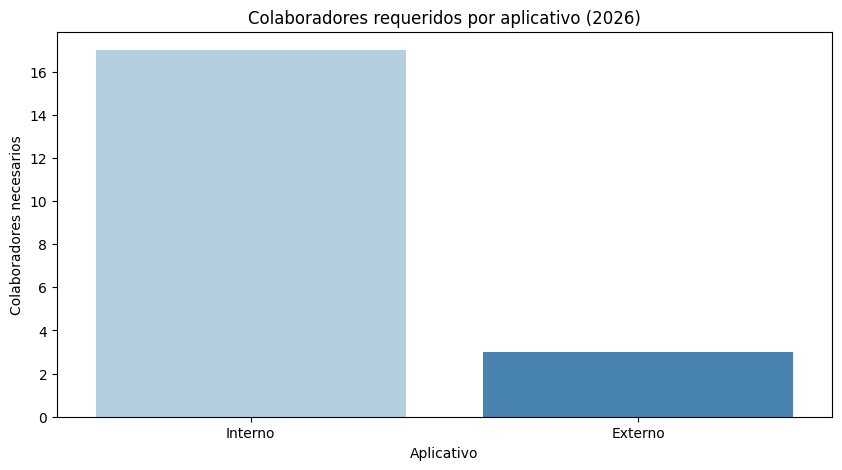

In [ ]:
# VISUALIZACIÓN
# =========================
plt.figure(figsize=(10,5))
sns.barplot(x="aplicativo", y="colaboradores_necesarios", data=proyeccion, palette="Blues")
plt.title(f"Colaboradores requeridos por aplicativo ({anio_proyeccion})")
plt.ylabel("Colaboradores necesarios")
plt.xlabel("Aplicativo")
plt.show()

CODIGO VALORES MENSUALES

In [ ]:
# PROMEDIOS HISTÓRICOS
# =========================
df['mes'] = df['fecha_radicacion'].dt.month
historico_mensual = df.groupby(["anio", "mes", "aplicativo"]).agg({
    "numero_factura": "count",
    "valor_factura": "sum",
    "cantidad_lineas": "mean"
}).reset_index().rename(columns={"numero_factura":"facturas","valor_factura":"facturacion"})

# Promedio mensual por aplicativo
promedios = historico_mensual.groupby("aplicativo").agg({
    "facturas": "mean",
    "facturacion": "mean",
    "cantidad_lineas": "mean"
}).reset_index()

# SIMULACIÓN MES A MES 2026
# =========================
meses = range(1,13)
resultados = []

for app in ["Interno", "Externo"]:
    prom_f = promedios.loc[promedios["aplicativo"]==app, "facturas"].values[0]
    prom_v = promedios.loc[promedios["aplicativo"]==app, "facturacion"].values[0]
    prom_l = promedios.loc[promedios["aplicativo"]==app, "cantidad_lineas"].values[0]

    # Ajuste por porcentaje de aplicativo y crecimiento anual
    prom_f = prom_f * (1 + crecimiento_facturas) * (p_interno if app=="Interno" else p_externo)
    prom_v = prom_v * (1 + crecimiento_facturacion) * (p_interno if app=="Interno" else p_externo)

    for mes in meses:
        # Simulamos facturas y facturación mensualmente
        facturas_mes = int(prom_f * np.random.uniform(0.95, 1.05))  # +/-5% aleatorio
        facturacion_mes = prom_v * np.random.uniform(0.95, 1.05)

        # Estimación de horas promedio por factura
        horas = []
        for _ in range(facturas_mes):
            # Generamos valor aproximado factura
            valor = np.random.uniform(5_000, facturacion_mes/facturas_mes*1.5)
            lineas = max(1, int(np.random.normal(prom_l, prom_l*0.3))) # desviación 30%
            if app=="Interno":
                horas.append(horas_por_factura_interno(valor, lineas))
            else:
                horas.append(horas_por_factura_externo(valor, lineas))

        total_horas = sum(horas)
        colaboradores_necesarios = np.ceil(total_horas / (horas_diarias_por_colaborador*dias_laborales_mes))

        resultados.append({
            "anio": anio_proyeccion,
            "mes": mes,
            "aplicativo": app,
            "facturas": facturas_mes,
            "facturacion": facturacion_mes,
            "horas_totales": total_horas,
            "colaboradores_necesarios": colaboradores_necesarios
        })

df_proyeccion = pd.DataFrame(resultados)

In [ ]:
# SALIDA RESUMIDA
# =========================
print(df_proyeccion.groupby("aplicativo")[["colaboradores_necesarios","horas_totales"]].sum())


# Seleccionamos y ordenamos las columnas que queremos mostrar
tabla_mensual = df_proyeccion[[
    "mes",
    "aplicativo",
    "facturas",
    "facturacion",
    "horas_totales",
    "colaboradores_necesarios"
]].copy()

# Map numerical month to month names for better readability
mes_map = {1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
           7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"}
tabla_mensual["mes"] = tabla_mensual["mes"].map(mes_map)

# Redondear y formatear si es necesario
tabla_mensual["facturacion"] = tabla_mensual["facturacion"].round(0)
tabla_mensual["horas_totales"] = tabla_mensual["horas_totales"].round(1)
tabla_mensual["colaboradores_necesarios"] = tabla_mensual["colaboradores_necesarios"].round(0)

# Ordenar por mes y aplicativo
orden_meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
tabla_mensual["mes"] = pd.Categorical(tabla_mensual["mes"], categories=orden_meses, ordered=True)
tabla_mensual = tabla_mensual.sort_values(["mes", "aplicativo"])

# Mostrar tabla en formato limpio
print("\n📊 PROYECCIÓN MENSUAL DE FACTURACIÓN Y CAPACIDAD")
display(tabla_mensual.style.format({
    "facturacion": "${:,.0f}",
    "facturas": "{:,.0f}",
    "horas_totales": "{:,.1f}",
    "colaboradores_necesarios": "{:,.0f}"
}))

total_colaboradores = int(df_proyeccion.groupby("aplicativo")["colaboradores_necesarios"].max().sum())
print(f"👥 Total colaboradores requeridos equipo de pagos (pico anual): {total_colaboradores}")

            colaboradores_necesarios  horas_totales
aplicativo                                         
Externo                         12.0     108.061669
Interno                        272.0   42669.862813

📊 PROYECCIÓN MENSUAL DE FACTURACIÓN Y CAPACIDAD


,mes,aplicativo,facturas,facturacion,horas_totales,colaboradores_necesarios
12,Enero,Externo,9,"$75,459,997",9.4,1
0,Enero,Interno,"5,222","$42,420,084,371","3,485.8",22
13,Febrero,Externo,9,"$80,012,543",7.7,1
1,Febrero,Interno,"5,350","$42,174,194,584","3,519.7",22
14,Marzo,Externo,9,"$78,097,578",8.9,1
2,Marzo,Interno,"5,521","$44,917,755,264","3,663.4",23
15,Abril,Externo,9,"$79,565,914",9.7,1
3,Abril,Interno,"5,131","$44,820,324,706","3,457.8",22
16,Mayo,Externo,9,"$80,702,476",10.7,1
4,Mayo,Interno,"5,490","$43,827,284,011","3,626.6",23


In [ ]:
total_colaboradores = int(df_proyeccion.groupby("aplicativo")["colaboradores_necesarios"].max().sum())
print(f"👥 Total colaboradores requeridos equipo de pagos (pico anual): {total_colaboradores}")

👥 Total colaboradores requeridos equipo de pagos (pico anual): 25
